##  **Import Libraries**

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Load and Explore the Dataset**

In [63]:
df = pd.read_csv("retail_sales_data.csv")
df

,Date,Category,Product,Units_Sold,Price_per_Unit,Total_Sales
0,2023-01-01,Toys,Board Game,3,368.68,1106.04
1,2023-01-01,Books,Fiction,3,228.46,685.38
2,2023-01-01,Home & Kitchen,Cookware Set,4,173.52,694.08
3,2023-01-01,Home & Kitchen,Microwave,1,485.26,485.26
4,2023-01-01,Toys,Doll,2,10.38,20.76
...,...,...,...,...,...,...
3560,2023-12-31,Clothing,Jeans,4,499.67,1998.68
3561,2023-12-31,Toys,Doll,2,372.40,744.80
3562,2023-12-31,Home & Kitchen,Cookware Set,1,276.44,276.44
3563,2023-12-31,Toys,Board Game,3,223.56,670.68


In [64]:
df.head()

,Date,Category,Product,Units_Sold,Price_per_Unit,Total_Sales
0,2023-01-01,Toys,Board Game,3,368.68,1106.04
1,2023-01-01,Books,Fiction,3,228.46,685.38
2,2023-01-01,Home & Kitchen,Cookware Set,4,173.52,694.08
3,2023-01-01,Home & Kitchen,Microwave,1,485.26,485.26
4,2023-01-01,Toys,Doll,2,10.38,20.76


In [65]:
df.tail()

,Date,Category,Product,Units_Sold,Price_per_Unit,Total_Sales
3560,2023-12-31,Clothing,Jeans,4,499.67,1998.68
3561,2023-12-31,Toys,Doll,2,372.40,744.80
3562,2023-12-31,Home & Kitchen,Cookware Set,1,276.44,276.44
3563,2023-12-31,Toys,Board Game,3,223.56,670.68
3564,2023-12-31,Home & Kitchen,Microwave,4,113.18,452.72


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3565 entries, 0 to 3564
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            3565 non-null   object 
 1   Category        3565 non-null   object 
 2   Product         3565 non-null   object 
 3   Units_Sold      3565 non-null   int64  
 4   Price_per_Unit  3466 non-null   float64
 5   Total_Sales     3565 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 167.2+ KB


In [68]:
df.shape

(3565, 6)

In [46]:
df.describe

<bound method NDFrame.describe of             Date        Category       Product  Units_Sold  Price_per_Unit  \
0     2023-01-01            Toys    Board Game           3          368.68   
1     2023-01-01           Books       Fiction           3          228.46   
2     2023-01-01  Home & Kitchen  Cookware Set           4          173.52   
3     2023-01-01  Home & Kitchen     Microwave           1          485.26   
4     2023-01-01            Toys          Doll           2           10.38   
...          ...             ...           ...         ...             ...   
3560  2023-12-31        Clothing         Jeans           4          499.67   
3561  2023-12-31            Toys          Doll           2          372.40   
3562  2023-12-31  Home & Kitchen  Cookware Set           1          276.44   
3563  2023-12-31            Toys    Board Game           3          223.56   
3564  2023-12-31  Home & Kitchen     Microwave           4          113.18   

      Total_Sales  
0         1106.04  
1          685.38  
2          694.08  
3          485.26  
4           20.76  
...           ...  
3560      1998.68  
3561       744.80  
3562       276.44  
3563       670.68  
3564       452.72  

[3565 rows x 6 columns]>

## **Check for Missing Values**

In [69]:
df.isnull().sum()

,0
Date,0
Category,0
Product,0
Units_Sold,0
Price_per_Unit,99
Total_Sales,0


## **Handle Missing Values**

In [70]:
df['Price_per_Unit'] = df.groupby('Product')['Price_per_Unit'].transform(lambda x: x.fillna(x.mean()))

In [71]:
df.isnull().sum()

,0
Date,0
Category,0
Product,0
Units_Sold,0
Price_per_Unit,0
Total_Sales,0


## **Convert Date Column & Add Month**

In [72]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')

## **Total Sales by Category**

In [73]:
category_sales = df.groupby('Category')['Total_Sales'].sum().sort_values(ascending=False)

In [74]:
category_sales

,Total_Sales
Category,
Clothing,473867.55
Toys,469054.89
Electronics,442437.70
Home & Kitchen,431085.74
Books,428600.60


## **Top 5 Products by Sales**

In [75]:
top_products = df.groupby('Product')['Total_Sales'].sum().sort_values(ascending=False).head(5)

In [76]:
top_products

,Total_Sales
Product,
Board Game,179811.85
T-Shirt,175681.10
Jeans,160018.13
Smartphone,157133.97
Headphones,151717.30


## **Monthly Sales Trend**

In [77]:
monthly_sales = df.groupby('Month')['Total_Sales'].sum()

In [78]:
monthly_sales

,Total_Sales
Month,
2023-01,196596.48
2023-02,189863.55
2023-03,179459.67
2023-04,193457.04
2023-05,192773.47
2023-06,182376.40
2023-07,177424.49
2023-08,183750.29
2023-09,162109.35


## **Data Visualization**

### **Category-wise Sales**

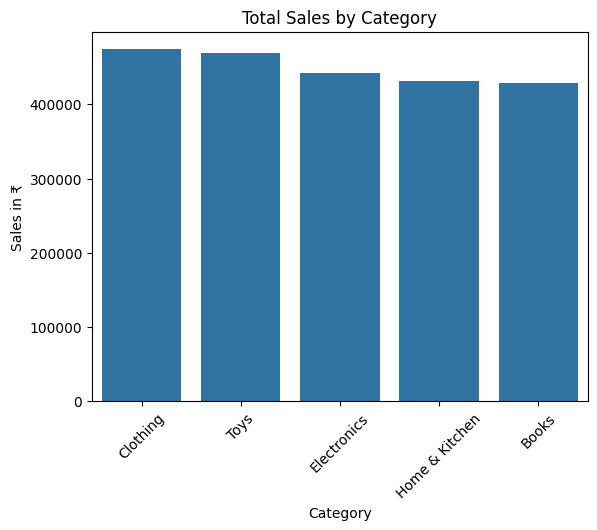

In [79]:
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Total Sales by Category")
plt.ylabel("Sales in ₹")
plt.xticks(rotation=45)
plt.show()

### **Monthly Sales Trend**

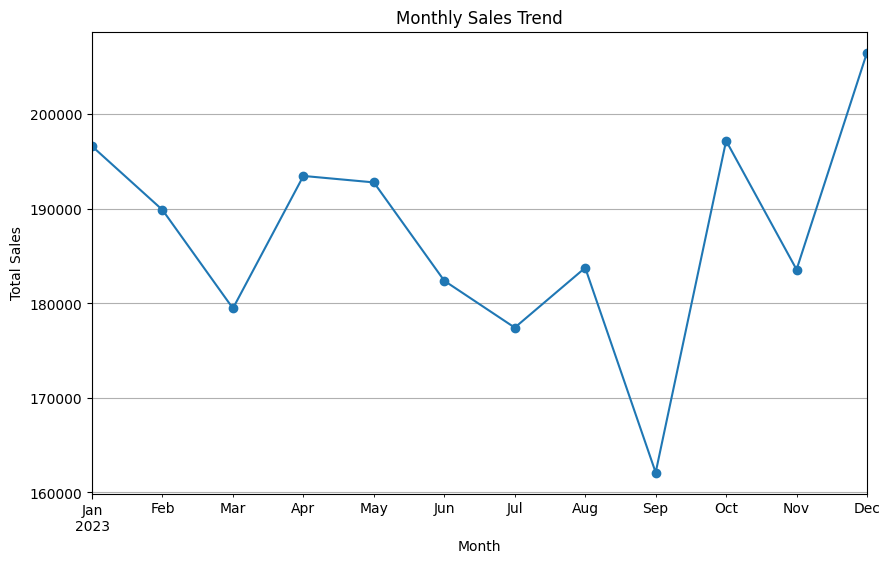

In [80]:
monthly_sales.plot(marker='o', figsize=(10,6), title="Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

## **Top 5 Products**

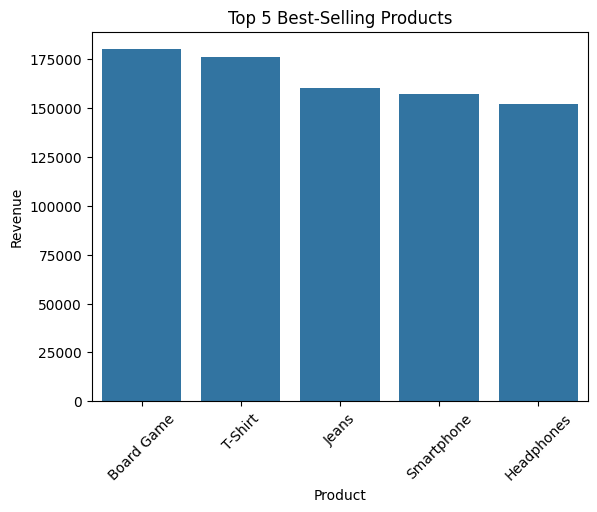

In [81]:
sns.barplot(x=top_products.index, y=top_products.values)
plt.title("Top 5 Best-Selling Products")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()